In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('air_bnb.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


Mengecek jumlah data yang memiliki nilai NULL

In [4]:
total_miss = data.isnull().sum().sort_values(ascending = False)
percent_miss = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total Missing','Percent'])
missing_data.head(20)

,Total Missing,Percent
reviews_per_month,3914,0.173554
last_review,3908,0.173288
name,59,0.002616
host_name,26,0.001153
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


Menghapus data yang memiliki nilai NULL

In [5]:
data = data.drop((missing_data[missing_data['Total Missing'] > 1]).index,1)

Menghapus beberapa kolom yang memiliki nilai unique

In [6]:
nilai_unik = data.nunique().sort_values(ascending = False)
data_unik = pd.concat([nilai_unik], axis=1, keys=['Nilai_Unique'])
data_unik

,Nilai_Unique
longitude,22552
latitude,22552
id,22552
host_id,19180
availability_365,366
number_of_reviews,306
price,295
neighbourhood,136
minimum_nights,102
calculated_host_listings_count,23


In [7]:
data = data.drop((data_unik[data_unik['Nilai_Unique'] > 19000]).index,1)

In [8]:
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,4,141
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,1,0
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,1,220
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,1,297
4,Pankow,Helmholtzplatz,Private room,42,2,197,1,26


## Mencari Nilai Kategorikal dan Numerical

Hal ini berfungsi untuk menormalisasi data tersebut

In [9]:
data.nunique().sort_values(ascending = True)

room_type                           3
neighbourhood_group                12
calculated_host_listings_count     23
minimum_nights                    102
neighbourhood                     136
price                             295
number_of_reviews                 306
availability_365                  366
dtype: int64

pada hasil nilai unique, saya mengambiil data kategori yaitu **room_type** dan **neighbourhood_group**, selainnya numerical. Dan pada nilai unique dapat dilihat bahwa **neighbourhood** memiliki nilai unique yang cukup banyak, oleh sebab itu saya olah dulu menjadi data numerical

## Data Kategorikal

In [10]:
data_cat = data[['room_type','neighbourhood','neighbourhood_group']] #  data kategorikal

In [11]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [12]:
panjang = data_cat.shape[1]
kolom = data_cat.columns

for i in range(panjang):
    hihi = encode.fit_transform(data_cat.iloc[:,i])
    hihi = pd.DataFrame(hihi, columns=[kolom[i]+' new'])
    data_cat = data_cat.join(hihi)

In [13]:
data_cat = data_cat.drop(['room_type','neighbourhood','neighbourhood_group'], axis=1)

## Data Numerical

In [14]:
data_num = data.iloc[:,3:] #  data Numercial
data_num = data_num.join(data_cat['neighbourhood new'])
data_cat = data_cat.drop('neighbourhood new',axis=1) #  menghapus neigbourhood new karena sudah menjadi data numerical

Untuk normalisasi nya menggunakan standard scaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
data_norm = scaler.fit_transform(data_num)
data_num = pd.DataFrame(data_norm, columns=data_num.columns)

C:\Users\rifqipambudhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rifqipambudhi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
data_num.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood new
0,-0.032433,-0.077637,2.724030,0.567676,0.512268,-1.500411
1,-0.227655,-0.126821,-0.322031,-0.250393,-0.668977,0.437255
2,0.103769,1.348680,3.403954,-0.250393,1.174101,0.512749
3,-0.186795,-0.053046,0.194712,-0.250393,1.819178,0.814723
4,-0.114154,-0.126821,4.872590,-0.250393,-0.451159,-0.720311


In [18]:
data_cat.head()

,room_type new,neighbourhood_group new
0,0,4
1,1,6
2,0,6
3,1,10
4,1,6


In [19]:
data_fix = data_num.join(data_cat)

In [20]:
data_fix.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood new,room_type new,neighbourhood_group new
0,-0.032433,-0.077637,2.724030,0.567676,0.512268,-1.500411,0,4
1,-0.227655,-0.126821,-0.322031,-0.250393,-0.668977,0.437255,1,6
2,0.103769,1.348680,3.403954,-0.250393,1.174101,0.512749,0,6
3,-0.186795,-0.053046,0.194712,-0.250393,1.819178,0.814723,1,10
4,-0.114154,-0.126821,4.872590,-0.250393,-0.451159,-0.720311,1,6


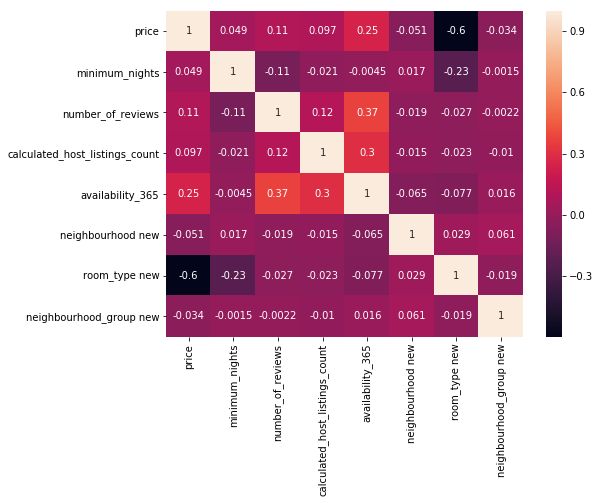

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data_fix.corr(method='spearman'), annot= True)
plt.show()

## Mencoba eksplorasi lain

Guna untuk membandingkan korelasi dengan **data_fix**

In [22]:
data_cat_coba = data[['room_type','neighbourhood','neighbourhood_group']] #  data kategorikal

panjang_coba = data_cat_coba.shape[1]
kolom_coba = data_cat_coba.columns

for i in range(panjang_coba):
    hihi_coba = encode.fit_transform(data_cat_coba.iloc[:,i])
    hihi_coba = pd.DataFrame(hihi_coba, columns=[kolom_coba[i]+'_new'])
    data_cat_coba = data_cat_coba.join(hihi_coba)

In [23]:
data_cat_coba = data_cat_coba.drop(['room_type','neighbourhood','neighbourhood_group'], axis=1)

In [24]:
data_cat_coba.head()

,room_type_new,neighbourhood_new,neighbourhood_group_new
0,0,18,4
1,1,95,6
2,0,98,6
3,1,110,10
4,1,49,6


In [25]:
data_num_coba = data.iloc[:,3:] #  data Numercial

In [26]:
data_lain = data_num_coba.join(data_cat_coba)

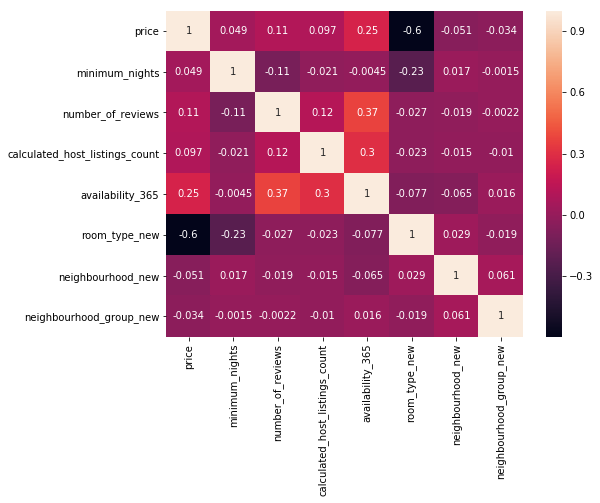

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(data_lain.corr(method='spearman'), annot= True)
plt.show()

Dapat disimpulkan meskipun **data numerical** yang sudah ternormalisasi maupun yang belum di normalisasi memiliki **korelasi** yang sama

Menyimpan data yang baru

In [28]:
data_fix.to_csv('airbnb_fix.csv', index=False)

## Klasifikasi Room_Type

Karena memiliki korelasi yang cukup tinggi yaitu **-0.6**

In [29]:
X = data_fix.drop('room_type new', axis=1)
y = data_fix['room_type new']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [39]:
from sklearn.metrics import accuracy_score

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
y_pred_tree = dt.predict(X_test)
acc_tree = accuracy_score(y_test,y_pred_tree)

print('Akurasi : ',acc_tree)

Akurasi :  0.721355090457609


In [47]:
hasil_tree = pd.DataFrame({'room_type_test':y_test,
            'room_type_pred':y_pred_tree})
hasil_tree.to_csv('Klasifikasi_DecisionTree.csv')

## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred_knn = neigh.predict(X_test)
acc_knn = accuracy_score(y_test,y_pred_knn)

print('Akurasi : ',acc_knn)

Akurasi :  0.7140830081589216


In [45]:
hasil_knn = pd.DataFrame({'room_type_test':y_test,
            'room_type_pred':y_pred_knn})
hasil_knn.to_csv('Klasifikasi_KNN.csv')

## Support Vector Machine

In [43]:
from sklearn.svm import SVC

svm = SVC(gamma='auto')
svm.fit(X_train,y_train)
y_pred_SVM = svm.predict(X_test)
acc_SVM = accuracy_score(y_test,y_pred_SVM)

print('Akurasi : ',acc_SVM)

Akurasi :  0.7727917701312522


In [46]:
hasil_SVM = pd.DataFrame({'room_type_test':y_test,
            'room_type_pred':y_pred_SVM})
hasil_SVM.to_csv('Klasifikasi_SVM.csv')